#  **Transfer Learning - Cat vs Dog Classifier using VGG16**

##  Introduction

###  What is Transfer Learning?
Transfer learning is a machine learning technique where a model developed for one task is reused as the starting point for a model on a second task. Instead of training a model from scratch, we leverage pretrained models (like VGG16) that have already learned useful features from massive datasets such as ImageNet.

###  About VGG16
VGG16 is a deep convolutional neural network developed by the Visual Geometry Group at Oxford. It has 16 layers and was trained on ImageNet (a dataset with over 14 million images). It is known for its simplicity, using 3x3 convolution filters and 2x2 max-pooling layers. VGG16 performs very well on a variety of image classification tasks and is widely used for transfer learning.

###  What We’ll Do in This Notebook
- Load the Cat vs Dog dataset (from Kaggle)
- Perform Exploratory Data Analysis (EDA)
- Use VGG16 as a fixed feature extractor (without data augmentation)
- Add a custom classification head
- Train the model on the training set
- Evaluate it on the validation set
- Predict and visualize the result on a sample image

---

VGG16 Transfer Learning - Cat vs Dog Classifier (Kaggle Dataset)

1. Import Libraries

In [1]:
pip install scipy


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy


2025-05-15 05:48:38.186214: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-15 05:48:38.211961: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-15 05:48:38.211985: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-15 05:48:38.211999: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-15 05:48:38.218316: I tensorflow/core/platform/cpu_feature_g

In [3]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13082181348646649965
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5833228288
locality {
  bus_id: 1
  links {
  }
}
incarnation: 7869101174619728008
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9"
xla_global_id: 416903419
]


2025-05-15 05:48:39.859209: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-05-15 05:48:39.865909: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-05-15 05:48:39.865936: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-05-15 05:48:39.967927: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-05-15 05:48:39.967957: I tensorflow/compile

In [4]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

from tensorflow import config
print("Physical GPUs:", config.list_physical_devices('GPU'))


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 998641692720173693
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5833228288
locality {
  bus_id: 1
  links {
  }
}
incarnation: 5378463975985387049
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9"
xla_global_id: 416903419
]
Physical GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2025-05-15 05:48:39.985651: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-05-15 05:48:39.985701: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-05-15 05:48:39.985710: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-05-15 05:48:39.985908: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-05-15 05:48:39.985921: I tensorflow/core/co

In [5]:
import tensorflow as tf
print(f"TensorFlow Version: {tf.__version__}")

TensorFlow Version: 2.14.0


In [6]:
pip install scipy


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [7]:
# pip show tensorflow


2. Define Path (Single Folder with Cat/Dog Subfolders)

In [8]:
data_dir = './dataset/PetImages'  # Adjust if needed


3. Set Parameters

- VGG16 was originally trained on the ImageNet dataset, where all input images were resized to 224x224x3. This shape is required when using the pretrained weights (weights='imagenet').

In [9]:
img_size = 224
batch_size = 32


 Why Use Data Generators?
- Data generators like `ImageDataGenerator` are essential when working with image datasets, especially large ones. They:
- Efficiently load images in batches to avoid memory overflow
- Automatically label images based on their folder structure
- Allow on-the-fly preprocessing (like rescaling, augmentation, etc.)
- Provide a convenient interface to feed data into Keras models

In this notebook, we use them **without augmentation** and only apply **rescaling** to normalize pixel values between 0 and 1.


4. Data Generators (With Validation Split)

In [10]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 19968 images belonging to 2 classes.
Found 4991 images belonging to 2 classes.


5. EDA: Check Class Indices

In [11]:
print("\nClass Indices:", train_generator.class_indices)



Class Indices: {'Cat': 0, 'Dog': 1}


In [12]:
train_generator.num_classes

2

6. Visualize Sample Images

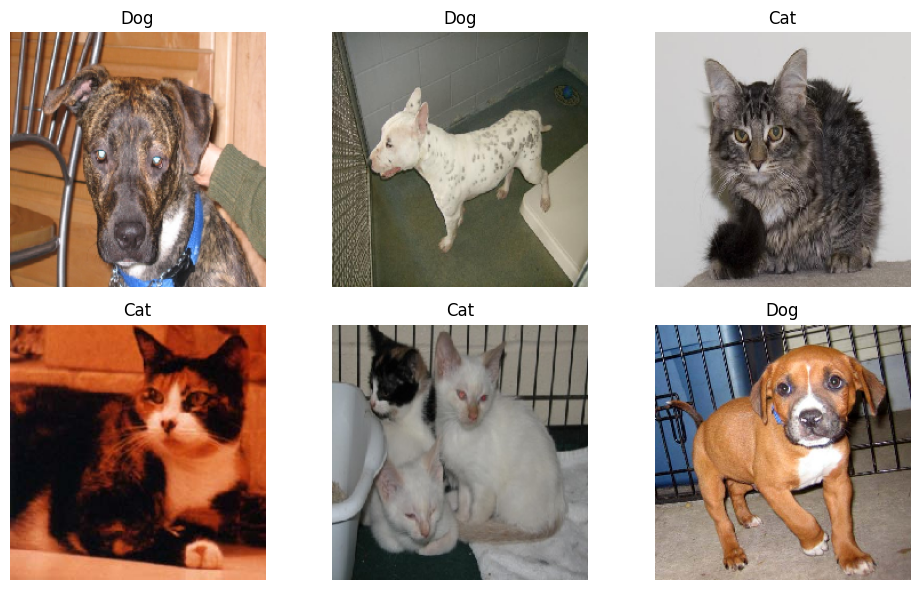

In [13]:
sample_images, sample_labels = next(train_generator)

plt.figure(figsize=(10, 6))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(sample_images[i])
    label_idx = np.argmax(sample_labels[i])
    label_name = list(train_generator.class_indices.keys())[label_idx]
    plt.title(label_name)
    plt.axis('off')
plt.tight_layout()
plt.show()


7. Load VGG16 Base Model

In [14]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))
base_model.trainable = False


2025-05-15 05:48:42.436989: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-05-15 05:48:42.437096: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-05-15 05:48:42.437112: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-05-15 05:48:42.437324: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-05-15 05:48:42.437336: I tensorflow/core/co

58889256/58889256 [==============================] - 15s 0us/step


8. Add Custom Classifier

In [15]:
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(train_generator.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)


9. Compile Model

In [16]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


10. Train Model

In [17]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    batch_size= 256,

)


Epoch 1/5


2025-05-15 05:49:03.712733: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8600
2025-05-15 05:49:06.200299: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f03e9088290 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-05-15 05:49:06.200362: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2025-05-15 05:49:06.207109: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-05-15 05:49:06.283227: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


525/624 [========================>.....] - ETA: 18s - loss: 0.3218 - accuracy: 0.8693

/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:866: UserWarning: Truncated File Read
  warnings.warn(str(msg))


624/624 [==============================] - 162s 254ms/step - loss: 0.3100 - accuracy: 0.8736 - val_loss: 0.2489 - val_accuracy: 0.8806
Epoch 2/5
624/624 [==============================] - 147s 235ms/step - loss: 0.2153 - accuracy: 0.9084 - val_loss: 0.1793 - val_accuracy: 0.9301
Epoch 3/5
624/624 [==============================] - 159s 254ms/step - loss: 0.1831 - accuracy: 0.9252 - val_loss: 0.1897 - val_accuracy: 0.9217
Epoch 4/5
624/624 [==============================] - 157s 251ms/step - loss: 0.1655 - accuracy: 0.9330 - val_loss: 0.1600 - val_accuracy: 0.9365
Epoch 5/5
624/624 [==============================] - 148s 236ms/step - loss: 0.1537 - accuracy: 0.9345 - val_loss: 0.1648 - val_accuracy: 0.9345


11. Plot Accuracy & Loss

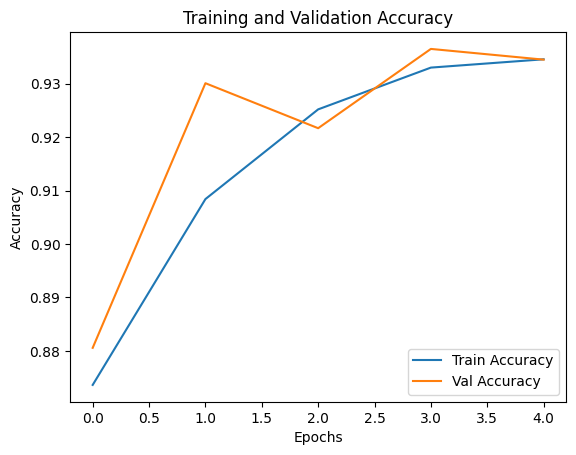

In [18]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()


12. Predict on a Single Image

1/1 [==============================] - 0s 280ms/step


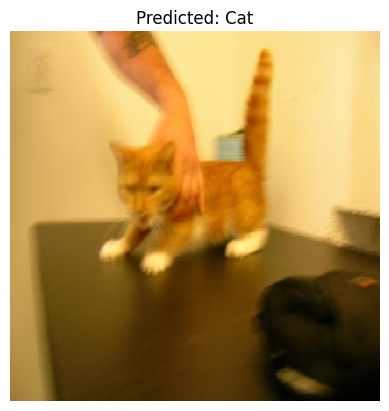

In [19]:
from tensorflow.keras.preprocessing import image

img_path = val_generator.filepaths[0]
img = image.load_img(img_path, target_size=(img_size, img_size))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
predicted_class_index = np.argmax(prediction[0])
class_labels = list(train_generator.class_indices.keys())
predicted_label = class_labels[predicted_class_index]

plt.imshow(img)
plt.title(f"Predicted: {predicted_label}")
plt.axis('off')
plt.show()

In [20]:
from tensorflow import config
print(config.list_physical_devices('GPU'))


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [21]:
import tensorflow as tf
print(tf.__version__)

2.14.0
